# <center> Project Title - UBER Rides Analysis <center>
 
# Shashank Dwivedi

## Problem Statement

1. How many trips have I done over the years?
2. How many trips were Completed and Canceled?
3. Where did most of the dropoffs occur?
4. What product type was usually chosen?
5. What was the avg. fare, distance, amount and time spent on rides?
6. Which weekdays had the highest average fares?
7. Which was the longest/shortest and more expensive/cheaper ride?
8. What was the average lead time before begining a trip?

##  Data Discovery

***Importing libraries***

In [1]:
# Libraries for handling numeric computation and dataframes
import numpy as np
import pandas as pd

# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Source

https://drive.google.com/file/d/1k-D-tdKXWHCpQFflpIJvfZAQgPyDedk-/view?usp=sharing

### Redaing data

In [2]:
rides=pd.read_csv("https://drive.google.com/uc?id=1k-D-tdKXWHCpQFflpIJvfZAQgPyDedk-")

***Use .head( ) method to gain more sensibility around data formatting and understand the overall structure of the dataset values.***

In [3]:
rides.head()

,City,Product Type,Trip or Order Status,Request Time,Begin Trip Time,Begin Trip Lat,Begin Trip Lng,Dropoff Time,Dropoff Lat,Dropoff Lng,Distance (miles),Fare Amount,Fare Currency
0,458,Black,COMPLETED,2021-01-13 22:06:46 +0000 UTC,2021-01-13 22:11:10 +0000 UTC,-23.599752,-46.715954,2021-01-13 22:29:13 +0000 UTC,-23.559359,-46.666542,4.84,29.63,BRL
1,458,VIP,COMPLETED,2021-01-13 20:21:05 +0000 UTC,2021-01-13 20:27:29 +0000 UTC,-23.559298,-46.666454,2021-01-13 20:54:50 +0000 UTC,-23.599585,-46.715717,5.31,20.86,BRL
2,458,VIP,COMPLETED,2021-01-03 00:23:22 +0000 UTC,2021-01-03 00:33:00 +0000 UTC,-23.626593,-46.659410,2021-01-03 00:50:56 +0000 UTC,-23.559273,-46.666595,5.90,34.23,BRL
3,458,VIP,COMPLETED,2020-12-11 23:16:33 +0000 UTC,2020-12-11 23:27:32 +0000 UTC,-23.559410,-46.666435,2020-12-12 00:32:47 +0000 UTC,-23.425755,-46.481190,19.74,58.77,BRL
4,458,VIP,COMPLETED,2020-12-11 00:35:46 +0000 UTC,2020-12-11 00:46:46 +0000 UTC,-23.584846,-46.663590,2020-12-11 00:57:57 +0000 UTC,-23.559261,-46.666510,2.54,12.63,BRL


## Checking basic dataset information (data types and dimensions)

In [4]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


***.rename( ) method allows you to rename axis labels (indexes and columns). In this case, I decided to normalize column names to clean up coding, since I could later call columns easily typing <data_frame>.<column>***

In [5]:
rides.rename(columns={'Trip or Order Status': 'status', 
    'Request Time': 'request_time',
    'Product Type':'product_type',
    'Begin Trip Time':'begin_time',
    'Begin Trip Lat':'begin_lat',
    'Begin Trip Lng':'begin_lng',
    'Dropoff Time':'dropoff_time',
    'Dropoff Lat':'dropoff_lat',
    'Dropoff Lng':'dropoff_lng',
    'Distance (miles)':'distance_miles',
    'Fare Amount':'fare_amount',
    'Fare Currency':'fare_currency',
    'City':'city'}, inplace=True)

#### Checking missing/null values

In [6]:
rides.isna().sum().sort_values(ascending=False)

begin_lat         29
begin_lng         29
dropoff_lat       29
dropoff_lng       29
product_type       3
fare_currency      3
city               0
status             0
request_time       0
begin_time         0
dropoff_time       0
distance_miles     0
fare_amount        0
dtype: int64

* We can see there are 29 missing values in 4 columns.

#### Checking For duplicates

In [7]:
rides.duplicated().sum()

0

* There are no duplicates values in dataset

## Data Preparation


***I decided to remove the column fare_currency, since all my trips happened inside a single country (Brazil).***

In [8]:
rides.drop(columns="fare_currency", inplace=True)

### Now let’s check the existence of missing values.

In [9]:
rides.isnull().sum().sort_values(ascending=False)

begin_lat         29
begin_lng         29
dropoff_lat       29
dropoff_lng       29
product_type       3
city               0
status             0
request_time       0
begin_time         0
dropoff_time       0
distance_miles     0
fare_amount        0
dtype: int64

***Despite empty Lng and Lat values (29 total), there were found 3 records without product_type. As shown below, these records are insignificant to my dataset, since practically no columns are fulfilled.***

In [10]:
rides[rides.product_type.isnull()]

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount
281,458,NaN,UNFULFILLED,2018-05-26 18:36:51 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
362,1449,NaN,UNFULFILLED,2018-02-13 01:59:25 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
392,1449,NaN,UNFULFILLED,2018-01-01 04:44:10 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0


***So now, let’s get rid of these 3 records before proceding.***

In [11]:
rides.dropna(subset=['product_type'], inplace=True)

#### Checking other missing values

In [12]:
rides[rides.begin_lat.isna()].sample(8)

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount
339,458,uberX,CANCELED,2018-03-04 21:43:00 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
319,458,POOL,CANCELED,2018-03-21 22:36:04 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
442,458,POOL,CANCELED,2017-10-31 09:22:39 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
84,458,UberX,CANCELED,2019-12-10 23:55:25 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
83,458,UberX,CANCELED,2019-12-10 23:57:58 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
226,458,Pool,CANCELED,2018-08-01 11:40:34 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
286,458,POOL,CANCELED,2018-05-17 01:58:05 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0
245,458,Pool,CANCELED,2018-07-12 11:51:54 +0000 UTC,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,1970-01-01 00:00:00 +0000 UTC,NaN,NaN,0.0,0.0


* The presence of null values in these four columns is attributed to instances where rides were canceled.
* Let's fill these values with some specfic values .

In [13]:
rides.fillna("-",inplace=True)

### Now let’s check again the existence of missing values.

In [14]:
rides.isnull().sum().sort_values(ascending=False).head()

city            0
product_type    0
status          0
request_time    0
begin_time      0
dtype: int64

* Now there are no missing values in our dataset

### Data Cleansing: Categorical features

While analyzing the first categorical column <product_type>, I could clearly see that some work was necessary since I could find different values referring to the same category. Then, I summarized 15 original categories in 5 ones.

In [15]:
# Checking categories in product_type column

rides.product_type.value_counts()

UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
Juntos                    1
UberBLACK                 1
uberx                     1
Name: product_type, dtype: int64

In [16]:
# Categories reclassification

product_mapping = {'UberX':'UberX','uberX':'UberX',
                   'uberX VIP':'UberX','VIP':'UberX',
                   'POOL':'Pool','POOL: MATCHED':'Pool',
                   'UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool',
                   'uberPOOL: MATCHED':'Pool',
                   'Pool: MATCHED':'Pool'}

In [17]:
# New categories replacement

rides['product_type'].replace(product_mapping, inplace=True)

In [18]:
# Checking new categories in product_type column
rides.product_type.value_counts()

UberX                   466
Pool                     70
UberEATS Marketplace     10
Black                     4
Juntos                    1
Name: product_type, dtype: int64

***As the scope of this analysis is only around Uber rides, I removed UberEATS records from my dataset.***

In [19]:
rides = rides[rides['product_type']!='UberEATS Marketplace']
rides['product_type'].value_counts()

UberX     466
Pool       70
Black       4
Juntos      1
Name: product_type, dtype: int64

***Our second categorical feature <status> seems well classified in 3 statuses, which will not require any treatment.***

In [20]:
rides.status.value_counts()

COMPLETED          444
CANCELED            87
DRIVER_CANCELED     10
Name: status, dtype: int64

### Data Transformation: Handling dates

***Our date features are in fact object data types, so we need to convert them into datetime format.***

In [21]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta

# Function to convert features to datetime
def date_convertion(df, cols):

  for col in cols:
    df[col] = df[col].\
    apply(lambda x: x.replace(' +0000 UTC', ''))
    df[col] = pd.to_datetime(df[col])
    
  return df

# Applying date_convertion function to date features 
rides = date_convertion(rides, 
                        ['request_time', 
                         'begin_time', 
                         'dropoff_time'])

#### Checking again info of data to see data types of dataset

In [22]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541 entries, 0 to 553
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   city            541 non-null    int64         
 1   product_type    541 non-null    object        
 2   status          541 non-null    object        
 3   request_time    541 non-null    datetime64[ns]
 4   begin_time      541 non-null    datetime64[ns]
 5   begin_lat       541 non-null    object        
 6   begin_lng       541 non-null    object        
 7   dropoff_time    541 non-null    datetime64[ns]
 8   dropoff_lat     541 non-null    object        
 9   dropoff_lng     541 non-null    object        
 10  distance_miles  541 non-null    float64       
 11  fare_amount     541 non-null    float64       
dtypes: datetime64[ns](3), float64(2), int64(1), object(6)
memory usage: 54.9+ KB


* Now we can clearly see our datetime columns data type has been changed successfully

###  Feature Engineering: Creating new features

***Now, let’s break down <request_time> feature into different date parts. I just did that for <request_time>, since I'm assuming that all rides were completed on the same day (believe me, I have already checked that! :D ).***

In [23]:
rides['year'] = rides.request_time.map(lambda x: datetime.strftime(x,"%Y"))
rides['month'] = rides.request_time.map(lambda x: datetime.strftime(x,"%b"))
rides['weekday'] = rides.request_time.map(lambda x: datetime.strftime(x,"%a"))
rides['time'] = rides.request_time.map(lambda x: datetime.strftime(x,"%H:%M"))


***Based on <fare_amount> and <distance_miles> features I've created a new feature called <amount_km>, which would help us understand how much is paid by kilometer ridden.***

In [24]:
rides['distance_km'] = round(rides['distance_miles']*1.60934,2)
rides['amount_km'] = round(rides['fare_amount']/rides['distance_km'],2)

***Delta time between <request_time> and <begin_time> will let us know how much time (in minutes) I usually waited for Uber cars to arrive at my destination. In this case, it was calculated on a minutes base.***

In [25]:
rides['request_lead_time'] = rides.begin_time - rides.request_time
rides['request_lead_time'] = rides['request_lead_time'].\
apply(lambda x:round(x.total_seconds()/60,1))

In [26]:
rides[['request_lead_time']].head()

,request_lead_time
0,4.4
1,6.4
2,9.6
3,11.0
4,11.0


***Similarly, the delta time between <dropoff_time> and <begin_time> will let us know how much time (in minutes) was spent on each trip.***

In [27]:
rides['trip_duration'] = rides.dropoff_time - rides.begin_time
rides['trip_duration'] = rides['trip_duration']. \
apply(lambda x: round(x.total_seconds()/60,1))

In [28]:
rides[['trip_duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
trip_duration,541.0,-330813.613309,2.893255e+06,-26348350.1,5.8,15.8,26.0,91.8


***As features in records with Canceled and Driver_Cancelled status will not be useful for my analysis, I set them as null values to clean up a little bit more in my dataset.***

In [29]:
rides.status.value_counts()

COMPLETED          444
CANCELED            87
DRIVER_CANCELED     10
Name: status, dtype: int64

In [30]:
completed_rides = rides[(rides.status!='CANCELED') & (rides.status!='DRIVER_CANCELED')]
completed_rides.shape

(444, 20)

In [31]:
completed_rides.status.value_counts()

COMPLETED    444
Name: status, dtype: int64

# Data Visualization

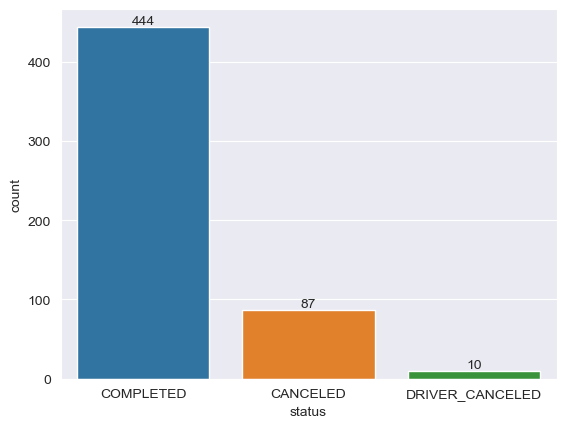

In [32]:
sns.set_style(style="darkgrid")
fig=sns.countplot(x="status",data=rides)
for label in fig.containers:
    fig.bar_label(label)
plt.show()

* The dataset indicates a total of 444 completed rides, along with 87 canceled rides and 10 instances of driver-canceled rides.

##  Data Analysis & Storytelling: It’s show time!

In order to organize better my analysis, I will create an additional data frame, removing all trips with status CANCELED and DRIVER_CANCELED, since they should be disregarded from some questions.

In [33]:
completed_rides.year.value_counts().sort_values()

2021      3
2016     17
2020     52
2019    106
2017    120
2018    146
Name: year, dtype: int64

### 1. How many trips have I done over the years?

A total of 444 trips were completed from Apr’16 to Jan’21. If we disregard 2016 and 2021 (not full years), we can clearly see that from 2017 to 2019 the average number of rides per year is 124, and that there is a huge drop from 2019 to 2020 (-51%). This is easily explained by the COVID outbreak.

Now, imagine if we extrapolate this result to all Uber users…

Total trips:  444
2016     17
2017    120
2018    146
2019    106
2020     52
2021      3
Name: year, dtype: int64


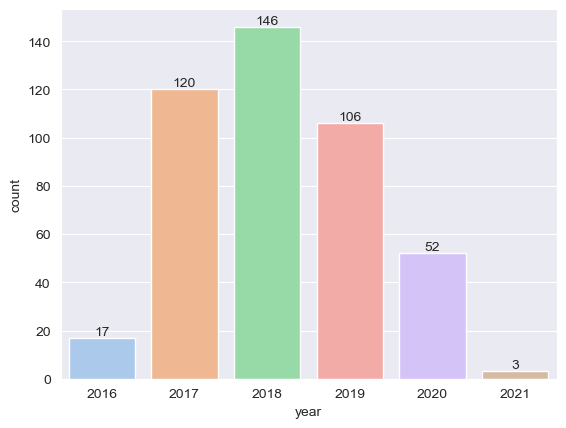

In [34]:
print('Total trips: ', completed_rides.status.count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
fig=sns.countplot(data=completed_rides,x='year',
    order=['2016','2017','2018','2019','2020','2021'], 
    palette='pastel')
for label in fig.containers:
    fig.bar_label(label)
plt.show()

### 2. How many trips were completed or canceled?

Looking at the stacked bars below, we can see that excluding 2015 and 2021 (due to low trip volume), 2020 has the highest cancelation rate. This could be an alarming indicator, considering the drastic impact caused to the businesses after the Covid outbreak. Overall, the cancelation rate was 17.9% (considering RIDERS and DRIVERS cancelations).

Total trips:  541
COMPLETED          82.1
CANCELED           16.1
DRIVER_CANCELED     1.8
Name: status, dtype: float64


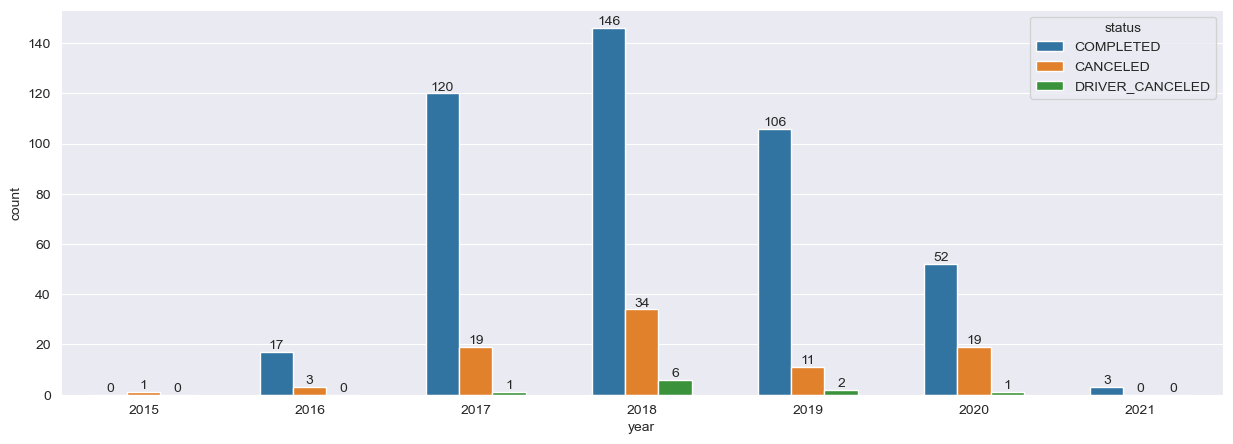

In [35]:
plt.figure(figsize=(15,5))
print('Total trips: ', 
rides.status.count())
print(round(rides.status.value_counts()/rides.status.size*100,1))
fig=sns.countplot(data=rides, 
x='year', 
order=['2015','2016','2017','2018','2019','2020','2021'], 
hue='status',width=0.6)
for label in fig.containers:
    fig.bar_label(label)
plt.show()

### 3. Where did most of the dropoffs occur?

The following heatmap dynamically shows the most frequented areas throughout different hues and intensities. This could be valuable information for Uber to adjust prices and optimize demand in certain regions, also combining time-space data to track users' behaviors.

In [36]:
!pip install folium

In [37]:
import folium
from folium import plugins

coord=[]
for lat,lng in zip(completed_rides.dropoff_lat.values,completed_rides.dropoff_lng.values):
  coord.append([lat,lng])

map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)

map.add_child(plugins.HeatMap(coord))
        
map

### 4. What product type was usually chosen?

UberX was by far the preferred product type with a frequency of 90.3%. So I could probably infer that I am the type of user who usually looks for affordable prices.

       Total Rides     %
UberX          401  90.3
Pool            39   8.8
Black            4   0.9


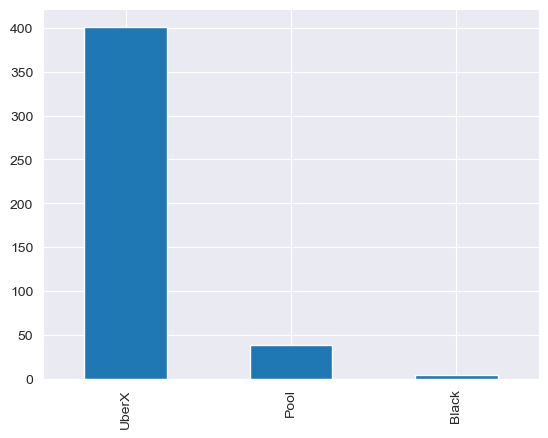

In [38]:
# Creating a serie with product types count
pt_rides = \
pd.Series(completed_rides.product_type.value_counts().\
          sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_rides)
# Including new column with trips portion
df['%'] = \
(completed_rides.product_type.value_counts(). \
 sort_index(ascending=False)/completed_rides. \
 product_type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Rides'}, 
          inplace=True)
print(df)
# Plotting product types count
completed_rides['product_type'].value_counts(). \
plot(kind='bar');

### 5. What was the average fare, distance, amount, and time spent on rides?

Considering all trips, the average amount spent per trip is 19.2 BRL, ridding in approx. 8.1 km. So, if we do a quick simulation on how much I would spend in a year to do daily round trips we would have: 365 days * 2 trips * 19.2 BRL/fare = 14,016 BRL/year

Also on average, It was spent approx. 2.4 BRL/km and 21.4 minutes by trip.

In [39]:
print('Avg. fare:', 
      round(completed_rides.fare_amount.mean(),1),
      'BRL')
print('Avg. distance:',
      round(completed_rides.distance_km.mean(),1),
      'km')
print('Avg. fare/km:',
      round(completed_rides.fare_amount. \
            sum()/completed_rides.distance_km.sum(),1),
      'BRL/km')
print('Avg. time spent on trips:',
      round(completed_rides.trip_duration.mean(),1),
      'minutes')
print('')
print('Total fare amount:', 
      round(completed_rides.fare_amount.sum(),1),
      'BRL')
print('Total distance:',
      round(completed_rides.distance_km.sum(),1),
      'km')
print('Total time spent on trips:',
      round(completed_rides.trip_duration.sum()/60,1),
      'hours')

Avg. fare: 19.2 BRL
Avg. distance: 8.1 km
Avg. fare/km: 2.4 BRL/km
Avg. time spent on trips: 21.4 minutes

Total fare amount: 8532.8 BRL
Total distance: 3575.0 km
Total time spent on trips: 158.4 hours


### 6. Which weekdays had the highest average fares per km ridden?

According to the chart below, we can see that Mondays, Wednesdays, Fridays and Sundays were on average the most expensive weekdays. Therefore, it allows us to better understand the weekly seasonality, and find out days with higher profitability for Uber and its drivers.

In [40]:
#overlapping pivot tables to get weighted average
amount_table = \
completed_rides. \
pivot_table(values='fare_amount',aggfunc='sum',
    columns='weekday', index='year').round(1)
column_order = \
['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table = \
amount_table.reindex(column_order, axis=1)

distance_table = \
completed_rides.pivot_table \
(values='distance_km',
 aggfunc='sum',columns='weekday', 
 index='year').round(1)
distance_table = \
distance_table.reindex \
(column_order, axis=1)

(amount_table/distance_table).round(1)

weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
year,,,,,,,
2016,NaN,NaN,2.8,2.4,NaN,2.1,2.9
2017,2.8,2.1,2.4,2.2,2.7,2.1,2.7
2018,2.0,1.9,2.6,2.0,2.2,2.4,2.2
2019,2.5,2.4,2.1,2.3,3.1,2.3,2.7
2020,2.7,2.4,2.7,2.6,2.4,3.1,2.8
2021,NaN,NaN,3.1,NaN,NaN,NaN,3.6


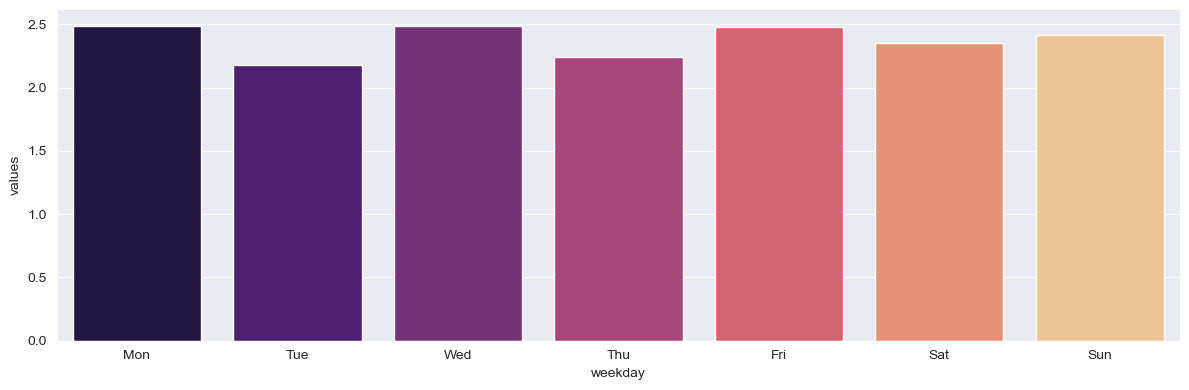

In [41]:
#creating an auxiliar data frame to 
#be displayed in category plot 
aux_serie = \
round((completed_rides.groupby \
       ('weekday')['fare_amount'].sum() \
       /completed_rides.groupby('weekday') \
       ['distance_km'].sum()),2)                                                                                                                              
amount_km_df = pd.DataFrame(aux_serie)

amount_km_df = amount_km_df.reset_index()
amount_km_df.rename(columns= \
    {'weekday':'weekday',0:'values'},inplace=True)

sns.catplot(x='weekday', 
    y='values', 
    data=amount_km_df, kind='bar', 
    height=4, aspect=3, 
    order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    palette='magma');

### 7. Which was the longest/shortest and more expensive/cheaper ride?

The table below shows records with the longest (31.77 km) and shortest rides (0.24 km).

In [42]:
rides_distance = \
completed_rides[ \
completed_rides.distance_km== \
completed_rides.distance_km.max()]
rides_distance = \
rides_distance.append( \
completed_rides[completed_rides.distance_km \
==completed_rides.distance_km.min()])
rides_distance

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.55941,-46.666435,2020-12-12 00:32:47,-23.425755,-46.48119,19.74,58.77,2020,Dec,Fri,23:16,31.77,1.85,11.0,65.2
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.50331,-46.636808,0.15,11.27,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6


Analyzing the amount paid by km ridden we have: expensive (46.96 BRL/km) and cheaper (0 BRL/km). This effect is basically driven by fixed minimum fare in high-demand periods since the total distance was only 0.24km.

In [43]:
rides_amount_km = \
completed_rides[completed_rides.amount_km== \
completed_rides.amount_km.max()]
rides_amount_km = \
rides_amount_km.append( \
completed_rides[completed_rides.amount_km== \
completed_rides.amount_km.min()])
rides_amount_km

,city,product_type,status,request_time,begin_time,begin_lat,begin_lng,dropoff_time,dropoff_lat,dropoff_lng,distance_miles,fare_amount,year,month,weekday,time,distance_km,amount_km,request_lead_time,trip_duration
305,458,UberX,COMPLETED,2018-04-15 23:18:40,2018-04-15 23:27:42,-23.502636,-46.624952,2018-04-15 23:34:17,-23.50331,-46.636808,0.15,11.27,2018,Apr,Sun,23:18,0.24,46.96,9.0,6.6
87,458,UberX,COMPLETED,2019-11-30 03:34:56,2019-11-30 03:40:37,-23.591813,-46.69072,2019-11-30 03:53:24,-23.559366,-46.666489,3.54,0.00,2019,Nov,Sat,03:34,5.70,0.00,5.7,12.8


### 8. What was the average lead time before beginning a trip?

It took approximately 5 minutes to start trips after they are requested.

In [44]:
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

4.9 minutes


## Conclusion!!!

***In summary, the exploratory data analysis (EDA) of Uber trips data reveals the following insights:***

- **COVID Impact:** Rides dropped by 51% in 2020 due to COVID-19, affecting business significantly.

- **Cancellation Rates:** 2020 had the highest cancellation rate (17.9%), reflecting pandemic challenges.

- **Geographical Patterns:** Heatmap identifies **high-demand areas** for pricing and demand adjustments.

- **User Preferences:** UberX is favored (90.3%), suggesting affordability is key.

- **Spending and Distance:** Average spend is 19.2 BRL per 8.1 km trip.

- **Profitable Days:** Mondays, Wednesdays, Fridays, and Sundays are more profitable.

- **User Behavior:** Average lead time before trips is around 5 minutes.